<a href="https://colab.research.google.com/github/marabaso/ie423/blob/main/ie423_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/purchase/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Explanatory Data Analysis

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


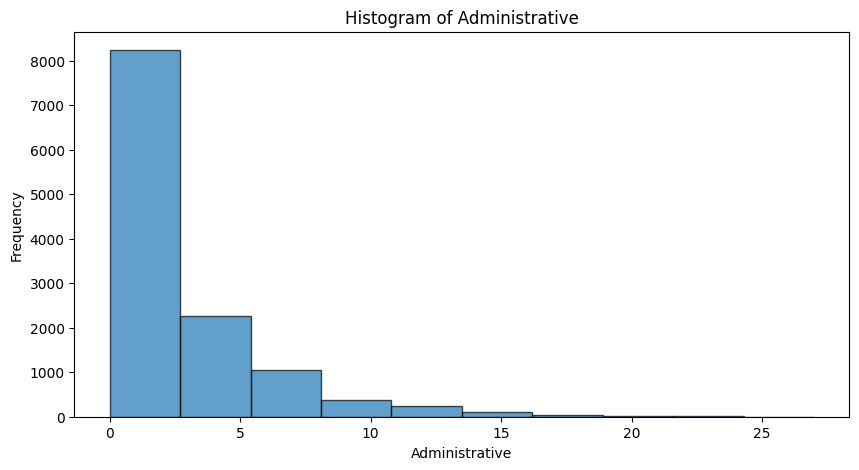

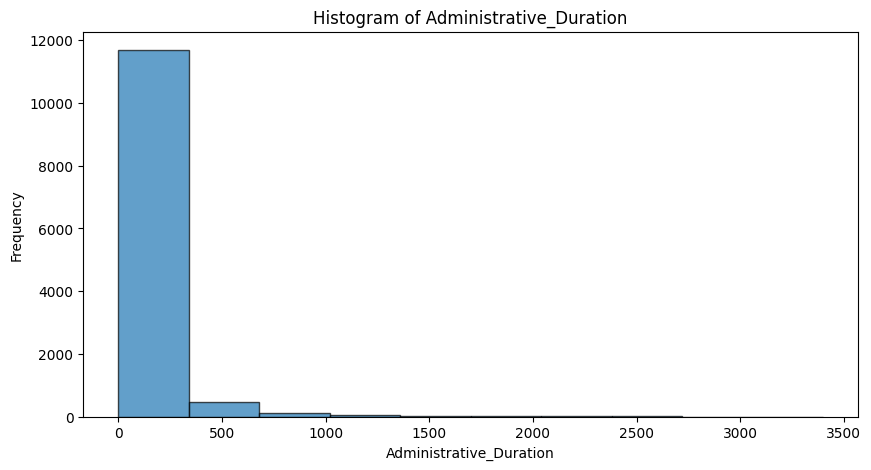

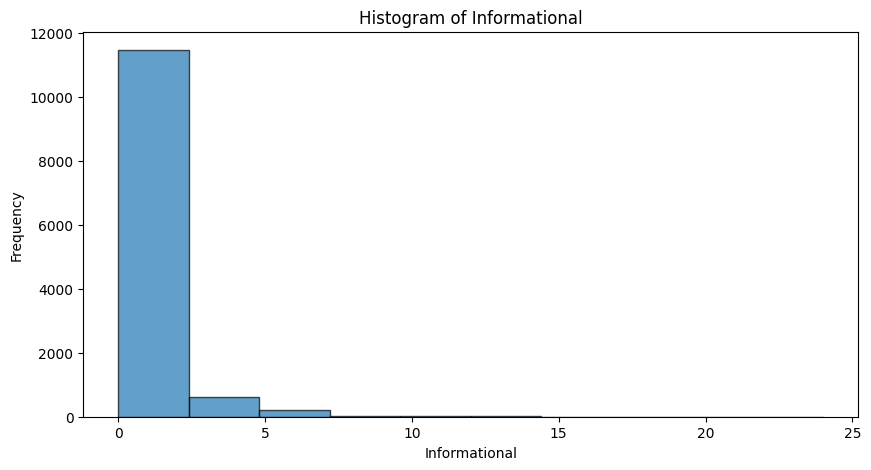

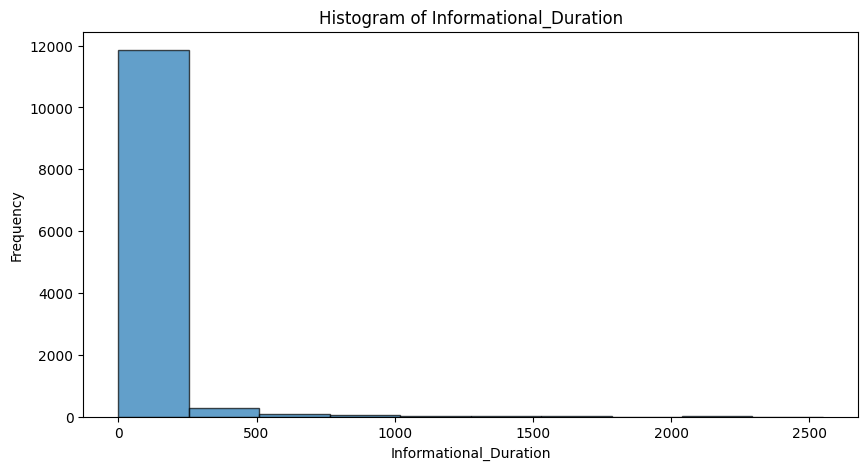

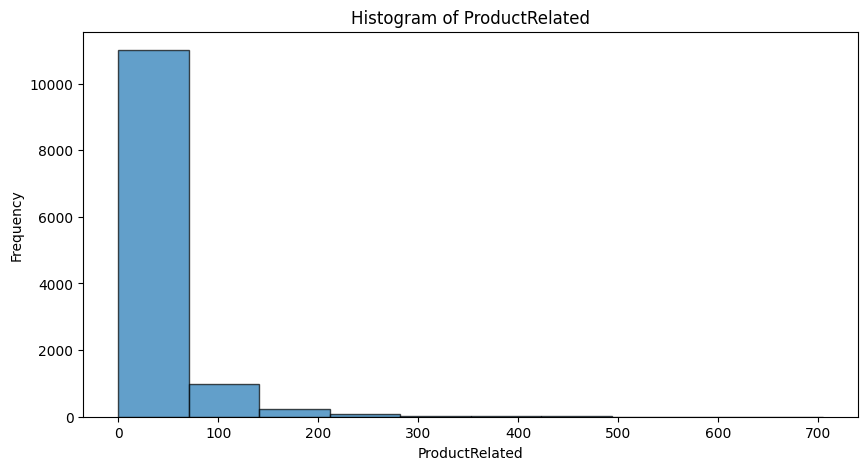

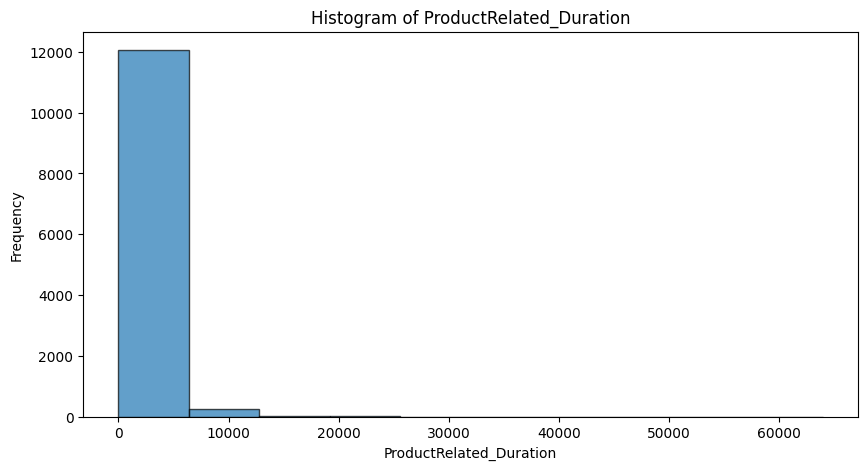

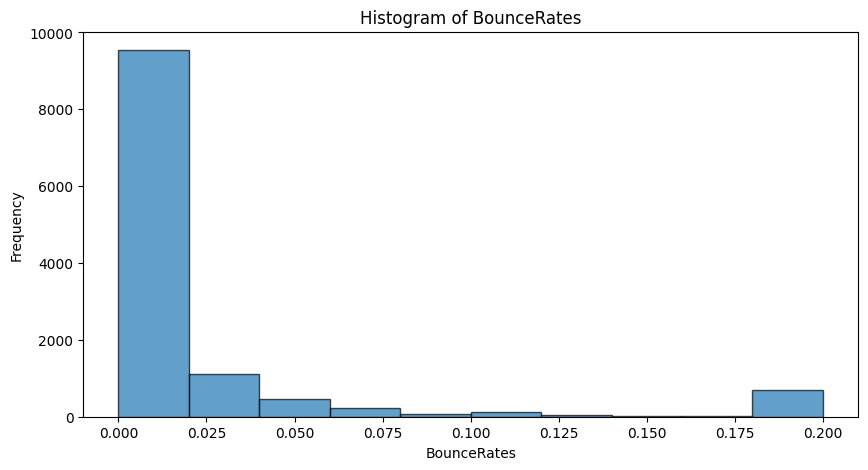

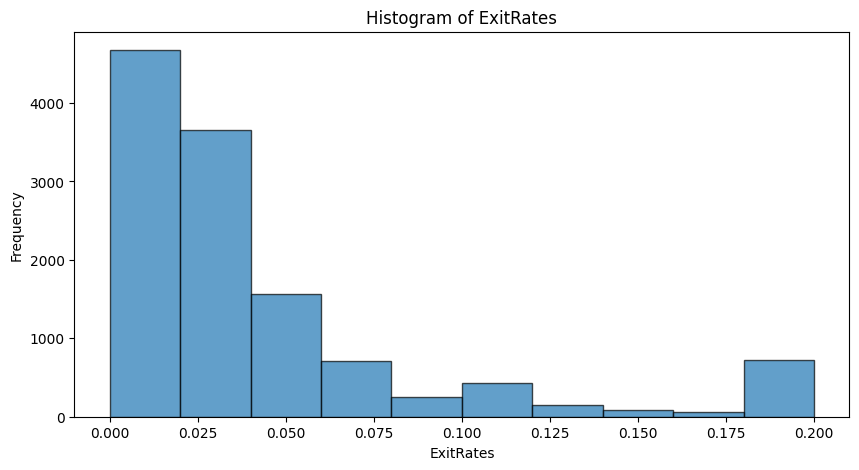

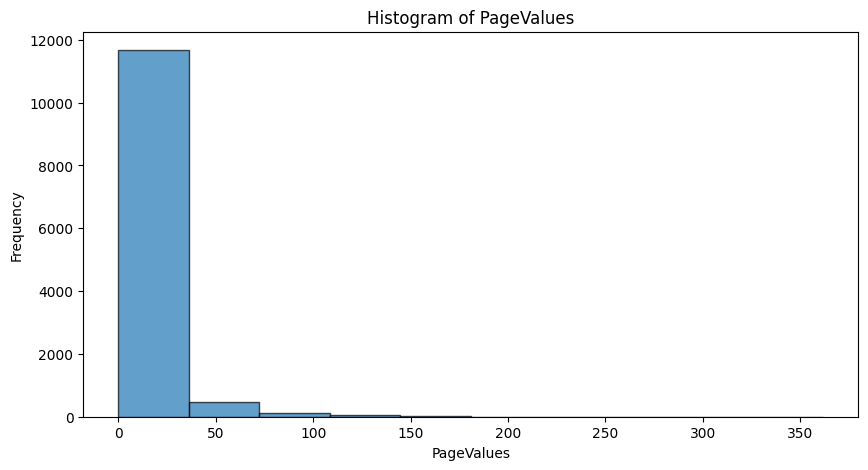

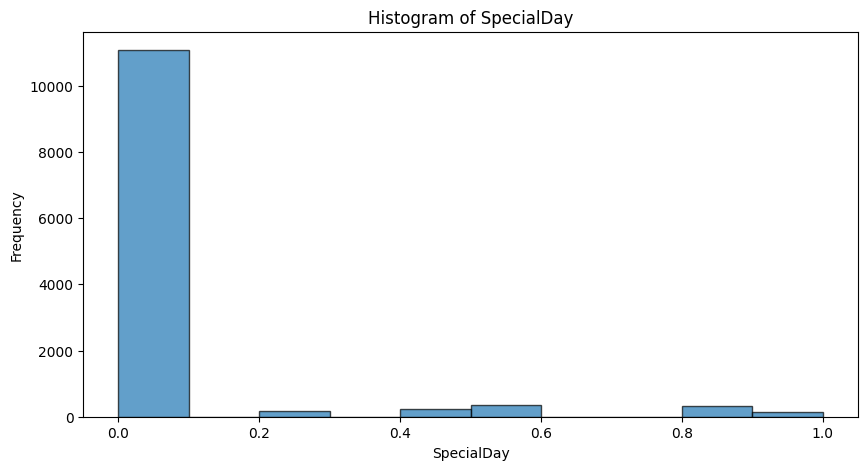

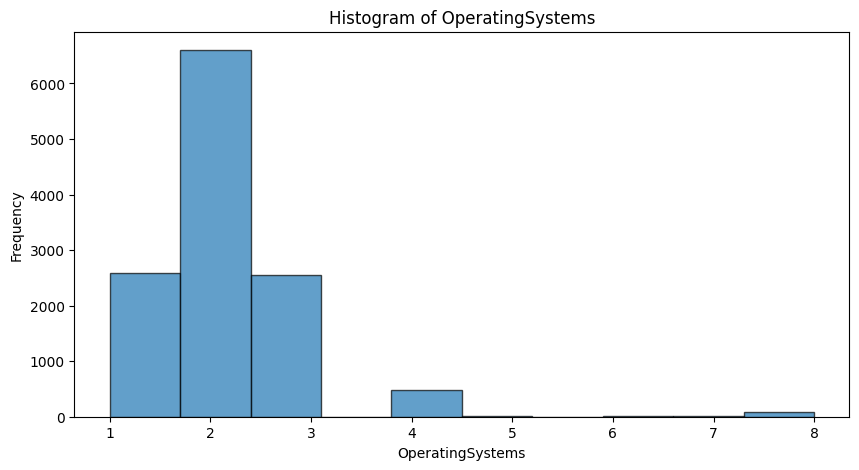

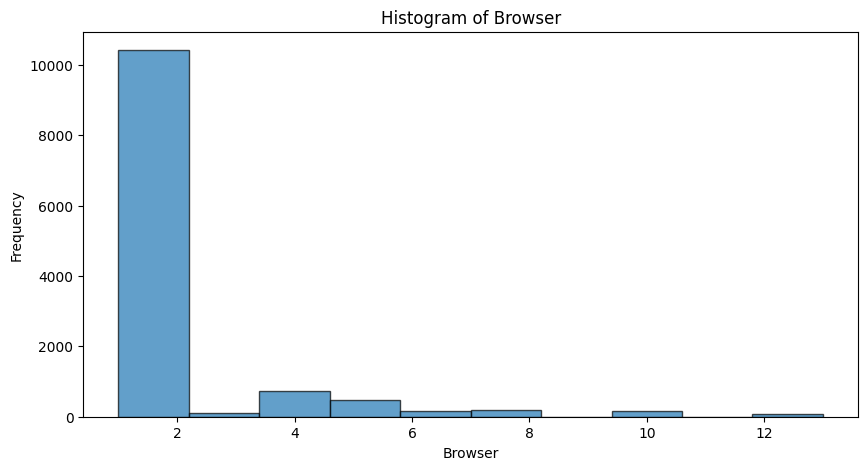

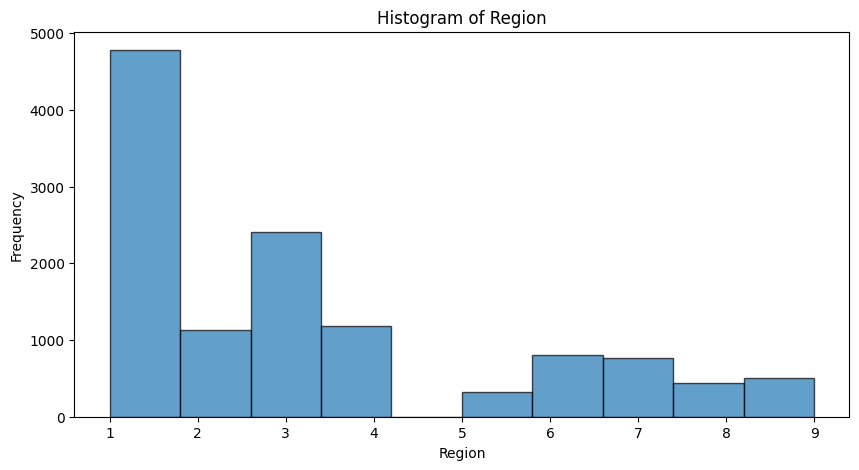

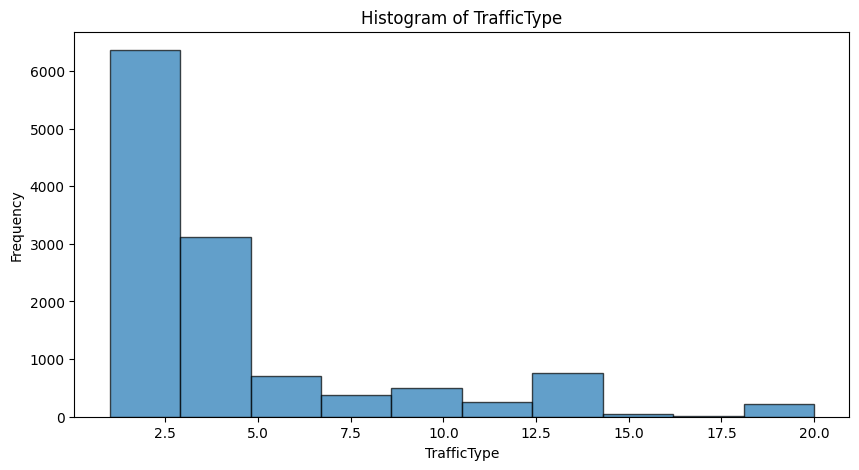

In [24]:
numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Most of the numeric variables have exponential-like histogram graphs

In [23]:
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


In [25]:
non_numeric_columns = df.select_dtypes(include=['object', 'bool']).columns

for column in non_numeric_columns:
    frequency_table = df[column].value_counts()
    print(f'Frequency table for {column}:\n{frequency_table}\n')

Frequency table for Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Frequency table for VisitorType:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Frequency table for Weekend:
Weekend
False    9462
True     2868
Name: count, dtype: int64

Frequency table for Revenue:
Revenue
False    10422
True      1908
Name: count, dtype: int64



* For month, we can say in summer there are less data, it may be related customer behavior on summer as they are on vacation and mey be less into shopping.\
* For VisitorType, we see most of the visitors have visited the page once.\
* For our target variable *Revenue*, we see that most of the time purchase not occured and approximately 15 % of the visitors made a purchase.

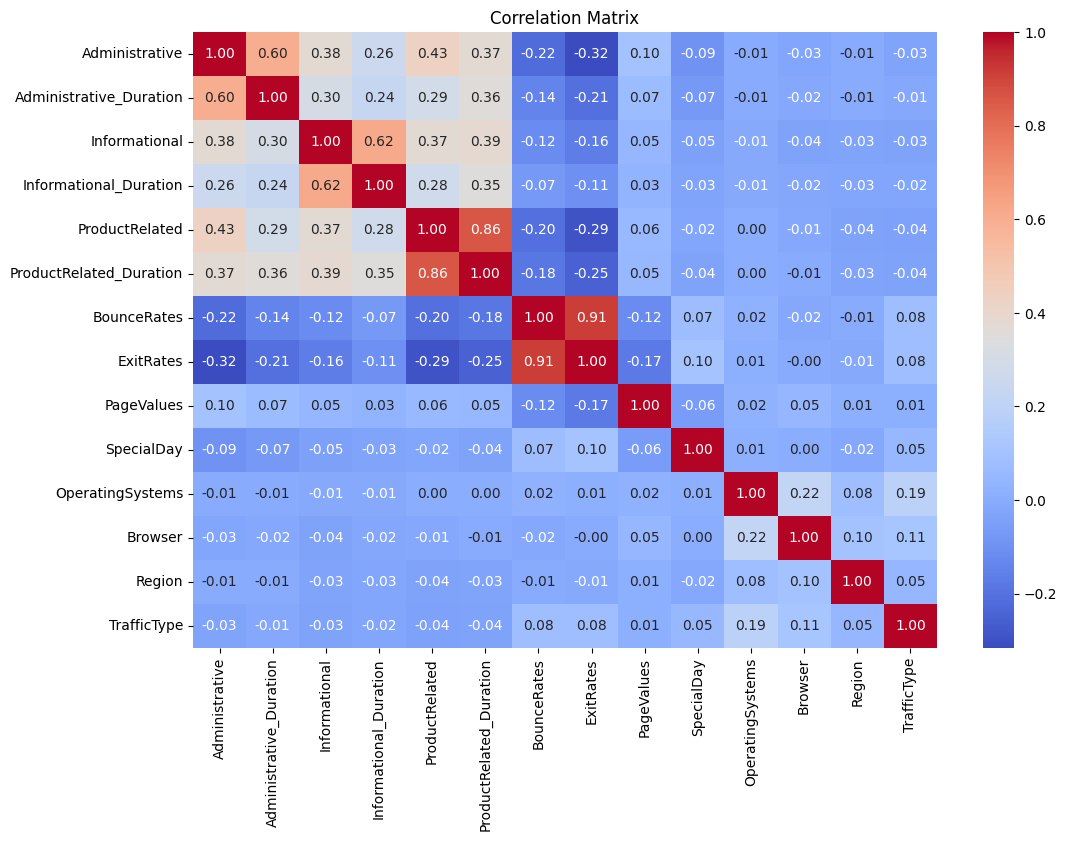

In [10]:
df_num = df.select_dtypes(include=['number'])
corr_mat = df_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

There are few correlated pairs. But to make sure let's make list of correlated pairs:

In [22]:
corr_pairs = corr_mat.unstack()
corr_pairs.sort_values(ascending=False)
corr_pairs = corr_pairs.abs().sort_values(ascending=False).reset_index()
corr_pairs = corr_pairs.drop_duplicates()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs = corr_pairs.drop_duplicates(subset = ['Correlation'])
corr_pairs.head(10)

,Variable 1,Variable 2,Correlation
14,ExitRates,BounceRates,0.913004
16,ProductRelated_Duration,ProductRelated,0.860927
18,Informational_Duration,Informational,0.618955
20,Administrative_Duration,Administrative,0.601583
22,ProductRelated,Administrative,0.431119
24,Informational,ProductRelated_Duration,0.387505
26,Informational,Administrative,0.376850
28,ProductRelated,Informational,0.374164
30,ProductRelated_Duration,Administrative,0.373939
32,ProductRelated_Duration,Administrative_Duration,0.355422


* ExitRates-BounceRates and ProductRelated_Duration-ProductRelated pairs seem highly correlated. It is not a surpise that visitors bounce (do not trigger any further action in the page) also exits the page. So we already know BounceRates <= ExitRates.
* ProductRelated_Duration-ProductRelated is also expected because they are both about product-related information and as visitor is into product it is expected of her to both spend more time on product and visit more pages.

# Data Preprocessing

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

First, let's check if there are any missing values in any of our variables:

In [26]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


We do not have any missing value in our dataset.

Now, let's use one hot encoder to encode our categorical variables:

In [29]:
cat_columns = df.select_dtypes(include=['object', 'bool']).columns #all categorical columns
ohe = OneHotEncoder(sparse=False, drop='first')
df_ohe = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                          columns=ohe.get_feature_names_out(cat_columns))
df= df.drop(cat_columns, axis=1)
df = pd.concat([df, df_ohe], axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


For models to learn patterns of the feaures more effectively and easily, now we normalize the features of our data set.

In [31]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552,-0.427872
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552,-0.427872
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552,-0.427872
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552,-0.427872
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,1.816360,-0.427872


# Feature Engineering

In [33]:
from sklearn.decomposition import PCA

In EDA, we observed a high correlation between BounceRates and ExitRates, and ProductRelatedDuration and ProductRelated. Let's try to handle those correlation with feature engineering.

In [32]:
df['Product_Admin_Ratio'] = df['ProductRelated_Duration'] / (df['Administrative_Duration'])
df['Bounce_Exit_Ratio'] = df['BounceRates'] / df['ExitRates']

Now we have also two new variables, let's see if all variables store significant enough information by PCA analysis:

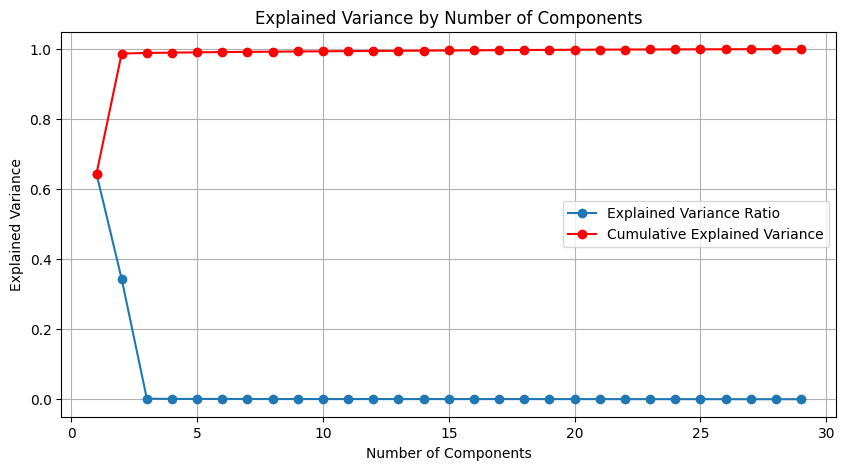

Components: 1, Cumulative Explained Variance: 0.6440
Components: 2, Cumulative Explained Variance: 0.9877
Components: 3, Cumulative Explained Variance: 0.9893
Components: 4, Cumulative Explained Variance: 0.9902
Components: 5, Cumulative Explained Variance: 0.9911
Components: 6, Cumulative Explained Variance: 0.9918
Components: 7, Cumulative Explained Variance: 0.9925
Components: 8, Cumulative Explained Variance: 0.9930
Components: 9, Cumulative Explained Variance: 0.9935
Components: 10, Cumulative Explained Variance: 0.9941
Components: 11, Cumulative Explained Variance: 0.9946
Components: 12, Cumulative Explained Variance: 0.9950
Components: 13, Cumulative Explained Variance: 0.9955
Components: 14, Cumulative Explained Variance: 0.9960
Components: 15, Cumulative Explained Variance: 0.9964
Components: 16, Cumulative Explained Variance: 0.9969
Components: 17, Cumulative Explained Variance: 0.9973
Components: 18, Cumulative Explained Variance: 0.9977
Components: 19, Cumulative Explained 

In [37]:
pca = PCA()
pca.fit(df)
explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = explained_var_ratio.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.legend()
plt.grid(True)
plt.show()

for i, v in enumerate(cumulative_explained_var, start=1):
    print(f"Components: {i}, Cumulative Explained Variance: {v:.4f}")

To have a cumulative explained variance over 99%, only 4 components are enough. Let's apply PCA. But for the sake of avoiding lost of information we also keep our original data set (in case we need our original df).

In [38]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(4)])

print(df_pca.head())

        PC1       PC2       PC3       PC4
0  0.017849 -0.969298 -3.715256 -3.077291
1 -1.508042 -0.887059 -1.933515 -0.905100
2  0.017572 -0.968751 -3.859460 -1.971031
3 -0.829971 -0.960834 -2.546685 -1.117067
4 -1.432299 -0.243992 -1.493198 -0.308192


# Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score

In [40]:
df_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/purchase/online_shoppers_intention.csv')

In [41]:
#lets split our dataset into train and test
X = df_pca
y = df_temp['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [53]:
def eval_model(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)
  return accuracy, report
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    accuracy, report = eval_model(model)
    results[name] = {'Accuracy': accuracy, 'Classification Report': report}

# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(result['Classification Report']).transpose())
    print("\n")

Model: Logistic Regression
Accuracy: 0.8869
Classification Report:
              precision    recall  f1-score      support
False          0.898717  0.975985  0.935759  2082.000000
True           0.756098  0.403646  0.526316   384.000000
accuracy       0.886861  0.886861  0.886861     0.886861
macro avg      0.827407  0.689815  0.731037  2466.000000
weighted avg   0.876509  0.886861  0.872001  2466.000000


Model: SVM
Accuracy: 0.8471
Classification Report:
              precision    recall  f1-score      support
False          0.848101  0.997598  0.916795  2082.000000
True           0.705882  0.031250  0.059850   384.000000
accuracy       0.847121  0.847121  0.847121     0.847121
macro avg      0.776992  0.514424  0.488323  2466.000000
weighted avg   0.825955  0.847121  0.783354  2466.000000


Model: Decision Tree
Accuracy: 0.8828
Classification Report:
              precision    recall  f1-score      support
False          0.929564  0.931796  0.930679  2082.000000
True           0.62

Logistic Regression
SVM
Decision Tree
Random Forest
MLP Classifier
K-Nearest Neighbors


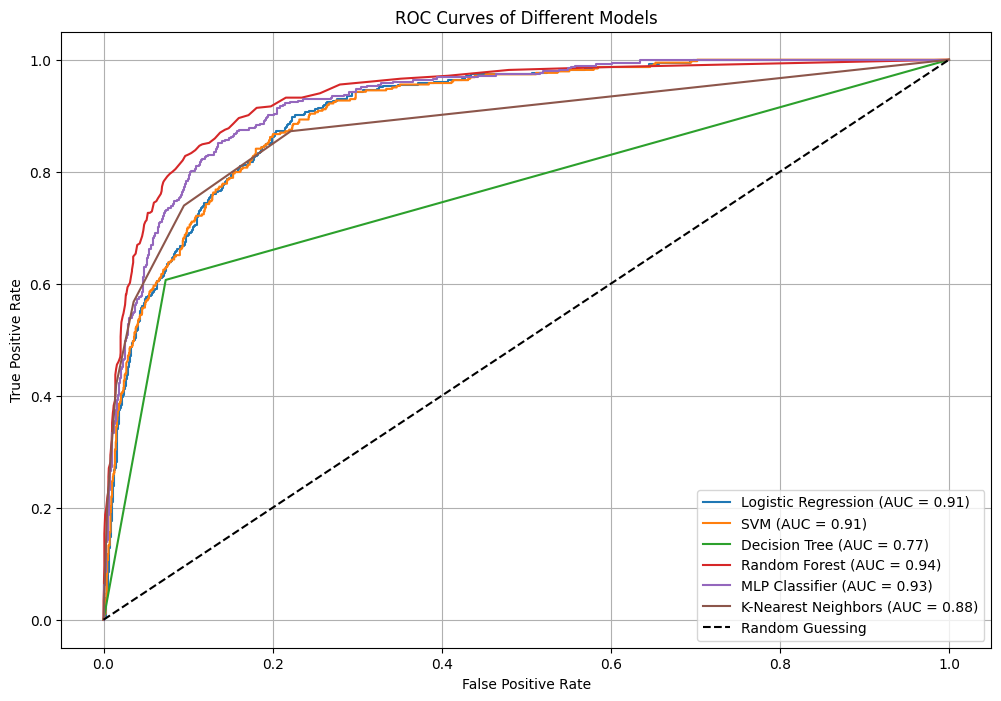

In [54]:
def eval_model_roc(model):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    return fpr, tpr, auc_score

plt.figure(figsize=(12, 8))

# Train and evaluate models, and compute ROC and AUC
for name, model in models.items():
    print(name)
    fpr, tpr, auc_score = eval_model_roc(model)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Customize the plot
plt.title('ROC Curves of Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


Among these models we have obtained that Random Forest yields the highest accuracy with 91 % and highest AUC score 0.94. So it seems to best working model among the ones we tried.

# Model Optimization

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                    n_iter=50,  # Number of parameter settings to sample
                                    cv=5,  # 5-fold cross-validation
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    verbose=2,
                                    random_state=25)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best Cross-Validation Accuracy: 0.9161
Test Accuracy with Best Parameters: 0.9140


# Insights and Conclusion

In this work, we made analysis on our dataset "Online Shoppers
Purchasing Intention". We wanted to see if it is possible to predict our target variable *Revenue* (True if the visitor made a purchase, False otherwise, to be
predicted) based on some features representing the interaction of visitors the shopping page. After preprocessing and feature engineering, we have observed that not all variables are significant while predicting *Revenue*. We have built severak models as:
* Logistic Regression
* SVM
* Decision Tree
* Random Forest
* MLP Classifier
* K-Nearest Neighbors

Random Forest was our best model. We tried to tune its hyperparameters by randomized grid search. However, we could not reach a significantly better model. It can be improved by full grid search which takes lots of time and requires much better hardware.

At the end, we would expect such a result because our predictor variables intuitevely seem to be related with our target variable.

In future work, by gathering more data and adding more significant features to this dataset, predicitions can be improved. These type of models help us to understand customers' behavior and help companies to build more efficient systems. Customers can also get the benefit of user-friendly and more customized online shopping systems.

